# 1. PageRank A 
---------------------------------------------

Using the button below you can show or hide the cells with the code.  

In [1]:
from IPython.core.display import HTML


def css_styling():
    styles = open("../styles/custom.css", "r").read()
    return HTML(styles)
css_styling()

### Comments

This chapter introduces finite **discrete time Markov chains**.  A DTMC is a sequence of random variables $\{X_0, X_1, X_2, \ldots \}$ that take values in a finite set of **states** ${\cal X}$. The DTMC is specified by the distribution of the initial state $X_0$ (for instance by specifying the value of $X_0$ or indicating how it is selected at random in ${\cal X}$) and the transition probabilities $P(i,j)$ for $i,j \in {\cal X}$.  Here, $P(i,j)$ is the probability that the Markov chain goes from $i$ to $j$ in the next step.  The transition probabilities are often shown in a transition diagram.

### Figure 1.2

![title](Figs/1-2.pdf)

Figure 1.2 illustrates a small web-browsing examples.  There are $5$ web pages: $A, B, C, D, E$.  When on page $A$, the reader is equally likely to go next to page $B$ or to page $D$.  Similarly, when on a given page, the reader is equally likely to follow any of the arrows that go out of the page.  These transitions happen when the reader clicks on one of the links on the page.  One is interested in the sequence of pages that the reader visits. In particular, one would like to rank the pages in decreasing order of their frequency of visits.  This order corresponds to the decreasing "relevance" of the pages.  That is the basic idea of PageRank.

The code simulates the Markov chain shown in Figure 1.2, plots the fraction of time it spends in the different states, and the probability of being in the different states. You can choose the initial state $X_0$ and the number of steps $N$. 

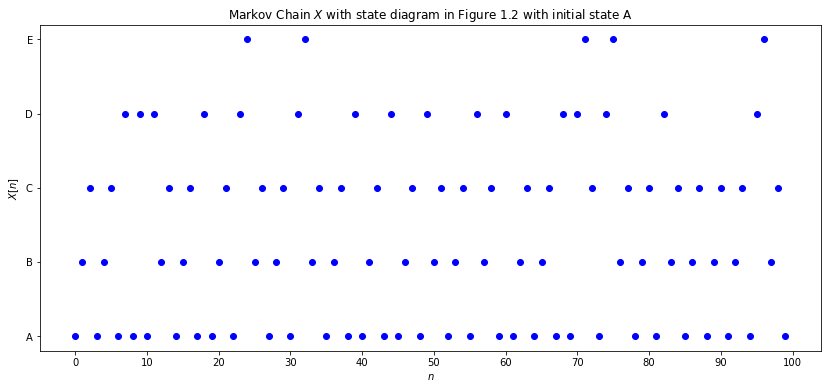

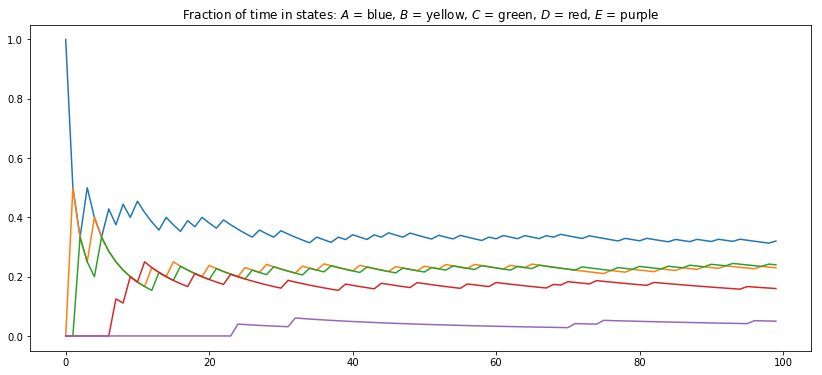

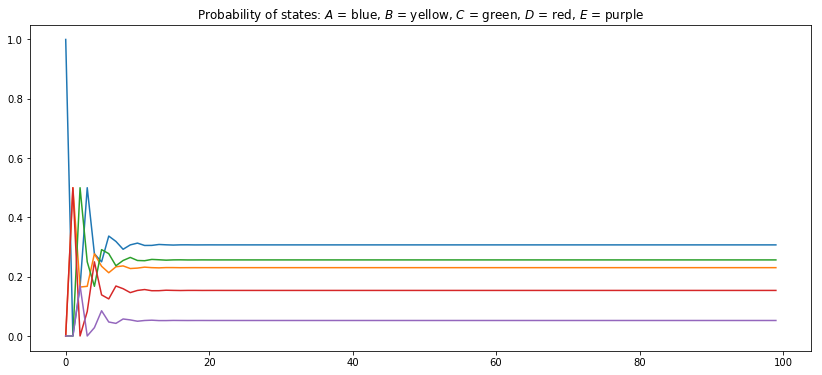

In [2]:
%matplotlib inline
from IPython.core.pylabtools import figsize
import numpy as np
from matplotlib import pyplot as plt
import random
from ipywidgets import *
from IPython.display import display

P = np.matrix('0 0.5 0 0.5 0; 0 0 1.0 0 0; 1.0 0 0 0 0;  0.33 0.33 0 0 0.34; 0 0.5 0.5 0 0')

def IDTMC(w,M):  # Simulation of DTMC with initial state w given by button 
    N = M
    L = len(P)
    a = np.arange(0,N)
    b = np.arange(0,N)
    f = np.zeros((N,L))
    R = np.zeros((N,L))
    if w == 'A':
        b[0] = 0
    elif w == 'B':
        b[0] = 1
    elif w == 'C':
        b[0] = 2
    elif w == 'D':
        b[0] = 3
    elif w == 'E':
        b[0] = 4   
    for k in range(L):
        f[0,k] = (k == b[0])   
        # This function simulates the Markov chains
        def DTMC(M,Q,x): # simulate DTMC, M steps, transitions Q, initial x, returns list of values
            v = np.arange(0,M)
            L = len(Q)
            R = np.zeros((M,L))
            for k in range(0,L):
                R[0,k] = float((k == b[0]))
            v[0] = x
            for j in range(1,M): # simulate Markov chain
                c = Q[v[j-1],0]
                z = random.random()
                i=0
                while c <= z: # compute next state
                    i = i+1
                    c = c + Q[v[j-1],i]        
                v[j] = i
                R[j,:] = R[j-1,:]*Q
            return (v,R)            
        (b,R) = DTMC(N,P,b[0])            
    for k in range(L): # compute fraction of time in states
        for j in range(N):
            f[j,k] = (j*f[j-1,k] + (k == b[j]))/(j+1)                       
    
    plt.figure(figsize = (14,6))
    plt.plot(a, b, 'bo') # plot states
    d = [0, N/10, 2*N/10, 3*N/10, 4*N/10, 5*N/10, 6*N/10, 7*N/10, 8*N/10, 9*N/10, N]
    plt.xticks(d)
    labels = ['A', 'B', 'C', 'D','E']
    plt.yticks([0, 1, 2, 3, 4], labels)
    plt.ylabel("$X[n]$")
    plt.xlabel("$n$")
    plt.title("Markov Chain $X$ with state diagram in Figure 1.2 with initial state "+w)
    
    plt.figure(figsize = (14,6))
    plt.title("Fraction of time in states: $A$ = blue, $B$ = yellow, $C$ = green, $D$ = red, $E$ = purple")
    for k in range(L): # plot fraction of time in states
        plt.plot(a, f[:,k])
    
    plt.figure(figsize = (14,6))
    plt.title("Probability of states: $A$ = blue, $B$ = yellow, $C$ = green, $D$ = red, $E$ = purple")
    for k in range(L): # plot probability of states
        plt.plot(a, R[:,k])    
        
u = widgets.ToggleButtons(options=['A', 'B', 'C', 'D', 'E'],
    description='$X_0$:',
    disabled=False,
    button_style='info', 
    tooltip='Description',
) 

u2 = widgets.IntSlider(description='N', min = 10, max = 200, step = 10, value = 100, position = 'bottom')
        
z = widgets.interactive(IDTMC, w = u, M = u2) 
display(z)
        

The **top figure** shows the random sequence of pages that the reader visits.  One cannot predict this sequence exactly since the reader chooses the next steps randomly.  Thus, the actual sequence will vary from experiment to experiment.  

The **middle figure** shows the fraction of time that the reader visits the different pages.  For instance, it plots the number of times during $\{0, 1, \ldots, n\}$ that the reader visited pages $A$ divided by $n + 1$ (the number of steps).  If this ratio is $17\%$ for a particular $n$, it means that the reader visited page $A$ $17\%$ of the time up to step $n$.  These fractions are random, since the sequence is random.  However, the middle figure shows that these fractions converge to some positive numbers.  Moreover, as you can test, these limiting fractions do not depend on the initial state, nor on the actual experiment.  Thus, these limits are relevant to any actual sequence.  The larger the fraction, the most "relevant" the page probably is.  

The **bottom figure** plots the probability of being on the different pages as a function of $n$.  For instance, if the probability of being on page $A$ at time step $n$ is $0.13$, this means that if one were to perform a large number of experiments, then about $13\%$ of them would be on page $A$ at step $n$.  Thus, in contrast with the top and middle figure, the bottom figure plots average values across all possible realizations of the experiment, instead of the values that correspond to one given experiment.  Let $\pi_n(i) = P(X_n = i)$ and $\pi_n$ be the row vector with components $\pi_n(i)$.  Then one has $\pi_{n} = \pi_{n-1} P = \pi_0 P^n$ where $P$ is the matrix of transition probabilities $P(i,j)$.

If you compare the bottom figure and the middle one, you see that 
the fractions of time in the states converge to the same values as the limiting probabilities of being in the states.  Moreover, it turns out that one can calculate this limiting values by solving the balance equations $\pi = \pi P$.  These limiting values indicate the relevance of the pages. Hence, with some simple algebra one can compute the relevance of pages. This is the PageRank algorithm.  The actual implementation by Google features a large number of tweaks to improve the relevance attached to specific keywords when you perform a search.

The fractions of time and $\pi_n$ converge because the Markov chain is **irreducible** and **aperiodic**.|

### Figure 1.5 

![title](Figs/1-5.pdf)

Figure 1.5 shows three different Markov chains.  The code below simulates them and plots the fraction of time in the states.  You select the Markov chain (a), (b), or (c) with the buttons and the number of steps $N$ with the slider. 

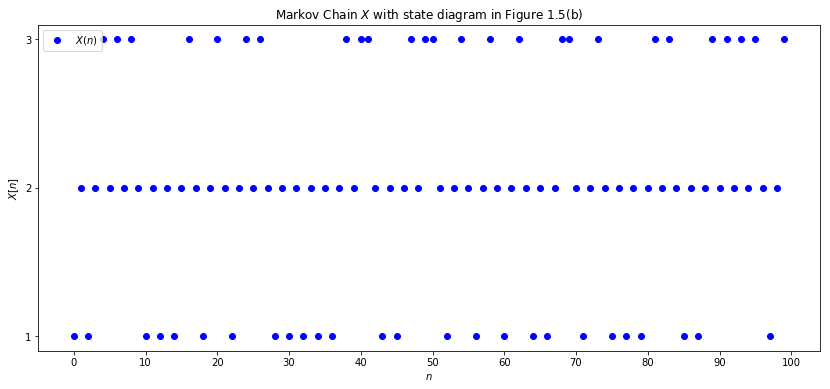

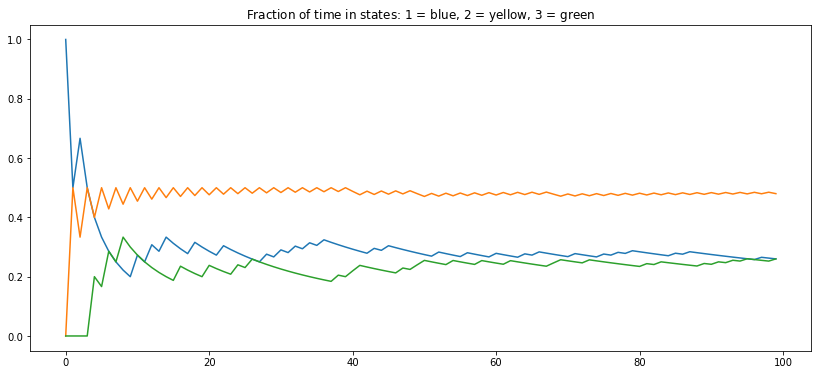

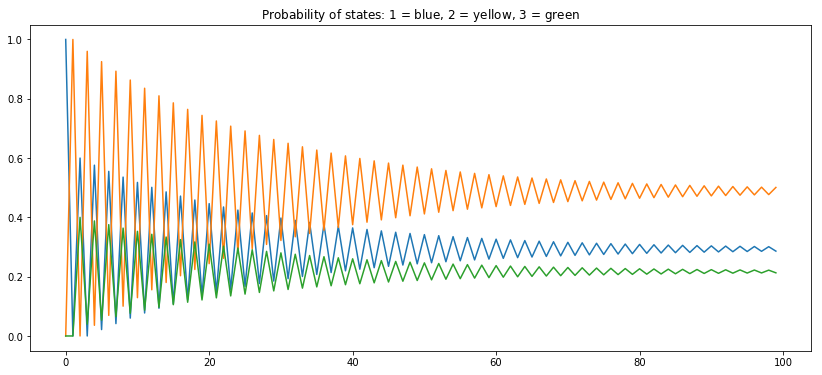

In [3]:
%matplotlib inline
from IPython.core.pylabtools import figsize
import numpy as np
from matplotlib import pyplot as plt
import random

from ipywidgets import *
from IPython.display import display

def SDTMC15(w,M):
    
    if w == '(a)':
        P = np.matrix('0 1.0 0; 0.6 0 0.4; 0 1.0 0')
    elif w == '(b)':
        P = np.matrix('0 1.0 0; 0.6 0 0.4; 0 0.9 0.1')
    elif w == '(c)':
        P = np.matrix('0 1.0 0; 0.6 0 0.4; 0 0 1.0')
    
    N = M
    L = len(P)
    a = np.arange(0,N)
    b = np.arange(0,N)
    f = np.zeros((L,N))

    b[0] = 0 # initial state
    for k in range(L):
        f[k,0] = (k == b[0])
    
           # This function simulates the Markov chains
        def DTMC(M,Q,x): # simulate DTMC, M steps, transitions Q, initial x, returns list of values
            v = np.arange(0,M)
            L = len(Q)
            R = np.zeros((M,L))
            for k in range(0,L):
                R[0,k] = float((k == b[0]))
            v[0] = x
            for j in range(1,M): # simulate Markov chain
                c = Q[v[j-1],0]
                z = random.random()
                i=0
                while c <= z: # compute next state
                    i = i+1
                    c = c + Q[v[j-1],i]        
                v[j] = i
                R[j,:] = R[j-1,:]*Q
            return (v,R)    
        
        (b,R) = DTMC(N,P,b[0])        
    
    for k in range(L): # compute fraction of time in states
        for j in range(N):
            f[k,j] = (j*f[k,j-1] + (k == b[j]))/(j+1)
                        
    plt.figure(figsize = (14,6))                
    plt.plot(a, b, 'bo', label='$X(n)$') # plot states
    d = [0, N/10, 2*N/10, 3*N/10, 4*N/10, 5*N/10, 6*N/10, 7*N/10, 8*N/10, 9*N/10, N]
    plt.xticks(d)
    labels = ['1', '2', '3']
    plt.yticks([0, 1, 2], labels)
    plt.legend()
    plt.ylabel("$X[n]$")
    plt.xlabel("$n$")
    plt.title("Markov Chain $X$ with state diagram in Figure 1.5"+w)
    
    plt.figure(figsize = (14,6))
    plt.title("Fraction of time in states: $1$ = blue, $2$ = yellow, $3$ = green")
    for k in range(L): # plot fraction of time in states
        plt.plot(a, f[k,:])
    
    plt.figure(figsize = (14,6))
    plt.title("Probability of states: $1$ = blue, $2$ = yellow, $3$ = green")
    for k in range(L): # plot probability of states
        plt.plot(a, R[:,k])  
        
u = widgets.ToggleButtons(options=['(a)', '(b)', '(c)'],
    description='Case:',
    disabled=False,
    button_style='info', 
    tooltip='Description',
#     icon='check'
)
u2 = widgets.IntSlider(description='N', min = 10, max = 200, step = 10, value = 100, position = 'bottom')
z = widgets.interactive(SDTMC15, w = u, M = u2) 
display(z)       

The three Markov chains behave quite differently.  (a) exhibits some periodicity: the state is $2$ for all the odd steps and the probabilities of being in the states do not converge: the Markov chain (a) is **periodic**;   (b) is more smooth and the probabilities converge: it is **aperiodic**; (c) gets trapped in state $3$: it is **not irreducible**. 

Note that for (a), although the probabilities do not converge, the fractions of time converge to limits that do not depend on the experiment nor on the initial state. This is so because the Markov chain is **irreducible**. As in the case of Figure 1.2, one can compute these limits by solving the balance equations.  Thus, fractions of time converge for an irreducible Markov chain even if it is periodic. Also, for any irreducible Markov chain (periodic or not), the balance equations have one and only one solution (that sums to one).


### Figure 1.6

In Figure 1.6, one flips a balanced die.  Here, we show a different example: we flip a loaded coin that has probability $p$ of heads.  We count the fraction of heads after $n$ flips. You can choose $p$ and $N$. 

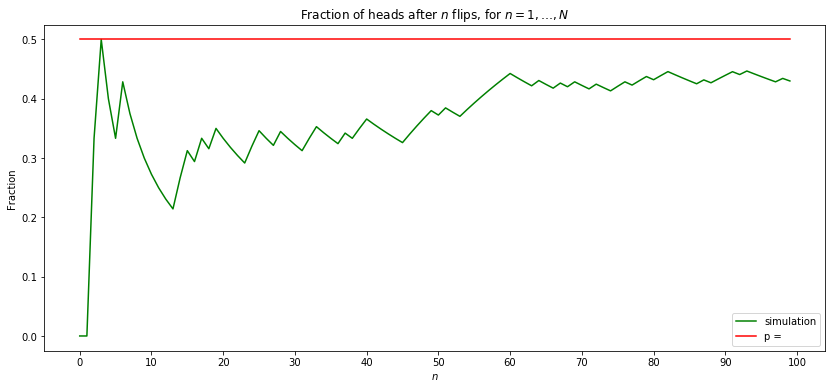

In [4]:
%matplotlib inline
from IPython.core.pylabtools import figsize
import numpy as np
from matplotlib import pyplot as plt
import scipy.stats as stats
from ipywidgets import *
from IPython.display import display

w1 = widgets.IntSlider(description='N', min = 10, max = 500, step = 10, value = 100)
w2 = widgets.FloatSlider(description='p', min = 0.1, max = 0.9, step = 0.1, value = 0.5)

def SLLN_demo(N,p):
    a = np.arange(0.0,N)
    b = np.arange(0.0,N)
    c = np.arange(0.0, N)
    b[0]= np.random.binomial(1,p)
    c[0] = p
    for i in range(0,N-1):
        b[i+1] = (b[i]*(i+1) + np.random.binomial(1,p))/(i+2)
        c[i+1] = p
    colours = ["b","g","r"]
    plt.figure(figsize = (14,6))
    plt.plot(a, b, color=colours[1],label="simulation")
    plt.plot(a, c, color=colours[2],label="p = " )
    d = [0, N/10, 2*N/10, 3*N/10, 4*N/10, 5*N/10, 6*N/10, 7*N/10, 8*N/10, 9*N/10, N]
    plt.xticks(d)
    plt.legend()
    plt.ylabel("Fraction")
    plt.xlabel("$n$")
    plt.title("Fraction of heads after $n$ flips, for $n = 1, \ldots, N$")
    
z = widgets.interactive(SLLN_demo, N = w1, p = w2)
display(z)




The fraction of heads converges to $p$, for any experiment.  This property is a consequence of the **Strong Law of Large Numbers**.  Note that the same property holds for **irreducible** Markov chains, as we saw in the cases of Figure 1.2 and Figure 1.5(a) and Figure 1.5(b).



